In [24]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
# Display all of the columns
pd.set_option('display.max_columns', None)

In [25]:
# Raw URL of the database file on GitHub
url = 'https://github.com/BFletchall/Project-4-Group-4-Machine-Learning/raw/main/claimed_timeU.db'
# Download the database file
r = requests.get(url)
with open('claimed_timeU.db', 'wb') as f:
    f.write(r.content)
# Connect to the SQLite database
conn = sqlite3.connect('claimed_timeU.db')
# Query data from the database table
query = "SELECT * FROM claimed_table"
# Read data into DataFrame
df = pd.read_sql(query, conn)
# Close the database connection
conn.close()
# Display the first few rows of the DataFrame
df.head()

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0


In [26]:
df.columns

Index(['NumberWithDash', 'EPM_ProductionControlItemID', 'EPM_MainMark',
       'EPM_InstanceNumber', 'Assembly_MainPieceProductionCode',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalHours_ThisLaborGroup'],
      dtype='object')

In [27]:
# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
#df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'] * 3600
#df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'].apply(lambda x: x * 3600)

# Fill NaN values in Assembly_EstTotalHours_ThisLaborGroup with 0
df['Assembly_EstTotalHours_ThisLaborGroup'].fillna(0, inplace=True)

# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'] * 3600

df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,328,0.0,0.0
11228,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Weld,9782,0.0,0.0
11229,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Fab/Layout,9133,0.0,0.0
11230,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,92,0.0,0.0


In [28]:
#df.dtypes
df['Assembly_EstTotalSeconds_ThisLaborGroup'].unique()

array([    0.     ,  6098.46   , 10474.86   , ...,  2792.673  ,
        2043.96525,   803.72025])

In [29]:
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalSeconds_ThisLaborGroup'].replace(0., np.nan)
df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,NaN
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,NaN
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,328,0.0,NaN
11228,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Weld,9782,0.0,NaN
11229,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Fab/Layout,9133,0.0,NaN
11230,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,92,0.0,NaN


In [30]:
# Drop columns with null values in the column Assembly_EstTotalHours_ThisLaborGroup
df_drop = df.dropna(subset=['Assembly_EstTotalSeconds_ThisLaborGroup'])
df_drop

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
816,22-130,637120,B456,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,62,1.694017,6098.460000
817,22-130,637120,B456,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2525,2.909683,10474.860000
818,22-130,637120,B456,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,99,1.694017,6098.460000
819,22-130,637120,B456,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2620,2.909683,10474.860000
820,22-130,637120,B456,3,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,14,1.694017,6098.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,24-011,837518,B107,38,CHANNEL,12.00,261.570,40.31,C,6 x 10.5,N - No Paint,45,11,Weld,1649,0.099224,357.207843
9896,24-011,837518,B107,39,CHANNEL,12.00,261.570,40.31,C,6 x 10.5,N - No Paint,45,11,Weld,4,0.049612,178.603922
9907,24-011,868657,B109,1,CHANNEL,11.08,125.442,26.59,C,4 x 5.4,N - No Paint,8,10,Fab/Layout,2310,0.775743,2792.673000
9908,24-011,868657,B109,1,CHANNEL,11.08,125.442,26.59,C,4 x 5.4,N - No Paint,8,10,Material Handling,241,0.567768,2043.965250


In [31]:
df_reduce =df_drop.drop(columns=['EPM_MainMark', 'Assembly_EstTotalHours_ThisLaborGroup', 'Assembly_SurfaceAreaEachSqFt', 'NumberWithDash'], inplace=False)
df_reduce

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalSeconds_ThisLaborGroup
816,637120,1,BEAM,40.97,2293.910,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,62,6098.460000
817,637120,1,BEAM,40.97,2293.910,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2525,10474.860000
818,637120,2,BEAM,40.97,2293.910,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,99,6098.460000
819,637120,2,BEAM,40.97,2293.910,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2620,10474.860000
820,637120,3,BEAM,40.97,2293.910,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,14,6098.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,837518,38,CHANNEL,12.00,261.570,C,6 x 10.5,N - No Paint,45,11,Weld,1649,357.207843
9896,837518,39,CHANNEL,12.00,261.570,C,6 x 10.5,N - No Paint,45,11,Weld,4,178.603922
9907,868657,1,CHANNEL,11.08,125.442,C,4 x 5.4,N - No Paint,8,10,Fab/Layout,2310,2792.673000
9908,868657,1,CHANNEL,11.08,125.442,C,4 x 5.4,N - No Paint,8,10,Material Handling,241,2043.965250


In [32]:
df_reduce.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPieceProductionCode', 'Assembly_MainPartLengthFt',
       'Assembly_WeightEachLbs', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalSeconds_ThisLaborGroup'],
      dtype='object')

In [33]:
# Determine the number of unique values in each column.
unique_values = df_reduce.nunique()
print(unique_values)

EPM_ProductionControlItemID                1176
EPM_InstanceNumber                          141
Assembly_MainPieceProductionCode             24
Assembly_MainPartLengthFt                   651
Assembly_WeightEachLbs                     1035
Assembly_MainPartShape                       13
Assembly_MainPartDimension                  208
Assembly_MainPartFinishDescr                 12
Assembly_TotalQuantityInJob                  31
Assembly_NumSmallParts                       75
EPM_AdjustedStationName                       7
TimeInSeconds_ThisWorkSegment              2067
Assembly_EstTotalSeconds_ThisLaborGroup    2764
dtype: int64


In [34]:
# Convert categorical data to numeric with `pd.get_dummies`
df_reduce_encoded = pd.get_dummies(df_reduce)
df_reduce_encoded

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalSeconds_ThisLaborGroup,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AL,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_FB,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_W,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1/2 x 2,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 11 3/8 §,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 13 13/16 §,Assembly_MainPartDimension_1/4 x 14,Assembly_MainPartDimension_1/4 x 14 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 16 1/4 §,Assembly_MainPartDimension_1/4 x 16 7/16 §,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 §,Assembly_MainPartDimension_1/4 x 2,Assembly_MainPartDimension_1/4 x 20 7/16 §,Assembly_MainPartDimension_1/4 x 25,Assembly_MainPartDimension_1/4 x 27 §,Assembly_MainPartDimension_1/4 x 6,Assembly_MainPartDimension_1/4 x 6 §,Assembly_MainPartDimension_1/4 x 6 3/4,Assembly_MainPartDimension_1/4 x 9 1/2,Assembly_MainPartDimension_10 3/4 x 0.25,Assembly_MainPartDimension_10 x 10 x 0.375,Assembly_MainPartDimension_10 x 10 x 0.5,Assembly_MainPartDimension_10 x 10 x 0.75,Assembly_MainPartDimension_10 x 100,Assembly_MainPartDimension_10 x 12,Assembly_MainPartDimension_10 x 15.3,Assembly_MainPartDimension_10 x 33,Assembly_MainPartDimension_10 x 39,Assembly_MainPartDimension_10 x 4 x 0.375,Assembly_MainPartDimension_10 x 45,Assembly_MainPartDimension_10 x 49,Assembly_MainPartDimension_10 x 5 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.5,Assembly_MainPartDimension_10 x 77,Assembly_MainPartDimension_11ga x 42 3/8,Assembly_MainPartDimension_11ga x 52 3/16,Assembly_MainPartDimension_11ga x 55 7/16,Assembly_MainPartDimension_11ga x 56 1/4,Assembly_MainPartDimension_11ga x 56 5/16,Assembly_MainPartDimension_11ga x 56 7/8,Assembly_MainPartDimension_12 3/4 x 0.25,Assembly_MainPartDimension_12 x 14.3,Assembly_MainPartDimension_12 x 170,Assembly_MainPartDimension_12 x 20.7,Assembly_MainPartDimension_12 x 22,Assembly_MainPartDimension_12 x 26,Assembly_MainPartDimension_12 x 35,Assembly_MainPartDimension_12 x 4 x 0.25,Assembly_MainPartDimension_12 x 40,Assembly_MainPartDimension_12 x 53,Assembly_MainPartDimension_12 x 58,

In [35]:
df_reduce_encoded.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalSeconds_ThisLaborGroup',
       'Assembly_MainPieceProductionCode_ALUM EMBED ANGLE',
       'Assembly_MainPieceProductionCode_ALUM PIPE',
       ...
       'Assembly_MainPartFinishDescr_N - No Paint',
       'Assembly_MainPartFinishDescr_S - Special Case',
       'Assembly_MainPartFinishDescr_T - Coal Tar For Aluminum',
       'EPM_AdjustedStationName_Beam Cambering', 'EPM_AdjustedStationName_Cut',
       'EPM_AdjustedStationName_Fab/Layout',
       'EPM_AdjustedStationName_Material Handling',
       'EPM_AdjustedStationName_Paint',
       'EPM_AdjustedStationName_Peddi Assembler',
       'EPM_AdjustedStationName_Weld'],
      dtype='object', length=272)

In [37]:
# X contains all features except 'Assembly_EstTotalSeconds_ThisLaborGroup'
X = df_reduce_encoded.drop("Assembly_EstTotalSeconds_ThisLaborGroup", axis=1)

#X = df_reduce_encoded.copy()
#X.drop("Assembly_SurfaceAreaEachSqFt", axis=1, inplace=True)
X.head()

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AL,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_FB,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_W,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1/2 x 2,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 11 3/8 §,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 13 13/16 §,Assembly_MainPartDimension_1/4 x 14,Assembly_MainPartDimension_1/4 x 14 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 16 1/4 §,Assembly_MainPartDimension_1/4 x 16 7/16 §,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 §,Assembly_MainPartDimension_1/4 x 2,Assembly_MainPartDimension_1/4 x 20 7/16 §,Assembly_MainPartDimension_1/4 x 25,Assembly_MainPartDimension_1/4 x 27 §,Assembly_MainPartDimension_1/4 x 6,Assembly_MainPartDimension_1/4 x 6 §,Assembly_MainPartDimension_1/4 x 6 3/4,Assembly_MainPartDimension_1/4 x 9 1/2,Assembly_MainPartDimension_10 3/4 x 0.25,Assembly_MainPartDimension_10 x 10 x 0.375,Assembly_MainPartDimension_10 x 10 x 0.5,Assembly_MainPartDimension_10 x 10 x 0.75,Assembly_MainPartDimension_10 x 100,Assembly_MainPartDimension_10 x 12,Assembly_MainPartDimension_10 x 15.3,Assembly_MainPartDimension_10 x 33,Assembly_MainPartDimension_10 x 39,Assembly_MainPartDimension_10 x 4 x 0.375,Assembly_MainPartDimension_10 x 45,Assembly_MainPartDimension_10 x 49,Assembly_MainPartDimension_10 x 5 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.5,Assembly_MainPartDimension_10 x 77,Assembly_MainPartDimension_11ga x 42 3/8,Assembly_MainPartDimension_11ga x 52 3/16,Assembly_MainPartDimension_11ga x 55 7/16,Assembly_MainPartDimension_11ga x 56 1/4,Assembly_MainPartDimension_11ga x 56 5/16,Assembly_MainPartDimension_11ga x 56 7/8,Assembly_MainPartDimension_12 3/4 x 0.25,Assembly_MainPartDimension_12 x 14.3,Assembly_MainPartDimension_12 x 170,Assembly_MainPartDimension_12 x 20.7,Assembly_MainPartDimension_12 x 22,Assembly_MainPartDimension_12 x 26,Assembly_MainPartDimension_12 x 35,Assembly_MainPartDimension_12 x 4 x 0.25,Assembly_MainPartDimension_12 x 40,Assembly_MainPartDimension_12 x 53,Assembly_MainPartDimension_12 x 58,Assembly_MainPartDimension_12 x 65,Assem

In [38]:
# Create y
y = df_reduce_encoded['TimeInSeconds_ThisWorkSegment'].copy()
y[:5]

816      62
817    2525
818      99
819    2620
820      14
Name: TimeInSeconds_ThisWorkSegment, dtype: int64

In [39]:
# Display the first few rows of X and y
print("X (features):")
print(X.head())
print("\ny (target):")
print(y.head())

X (features):
     EPM_ProductionControlItemID  EPM_InstanceNumber  \
816                       637120                   1   
817                       637120                   1   
818                       637120                   2   
819                       637120                   2   
820                       637120                   3   

     Assembly_MainPartLengthFt  Assembly_WeightEachLbs  \
816                      40.97                 2293.91   
817                      40.97                 2293.91   
818                      40.97                 2293.91   
819                      40.97                 2293.91   
820                      40.97                 2293.91   

     Assembly_TotalQuantityInJob  Assembly_NumSmallParts  \
816                            3                      18   
817                            3                      18   
818                            3                      18   
819                            3                      18   


In [40]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (3921, 271)
Targe Shape: (3921,)


In [41]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [49]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

In [50]:
X_scaler

StandardScaler()

In [51]:
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_test_scaled

array([[ 1.75877566, -0.18115964, -1.32546069, ..., -0.01844592,
        -0.19054122,  1.64827612],
       [-0.6887356 , -0.241786  ,  1.09359337, ..., -0.01844592,
        -0.19054122, -0.60669447],
       [ 0.54038517, -0.24852226, -0.16669772, ..., -0.01844592,
        -0.19054122, -0.60669447],
       ...,
       [-0.66099707, -0.24852226, -0.50064968, ..., -0.01844592,
        -0.19054122, -0.60669447],
       [ 1.76194259, -0.12726954, -1.1316343 , ..., -0.01844592,
        -0.19054122,  1.64827612],
       [-0.66449931, -0.24852226, -1.23735779, ..., -0.01844592,
        -0.19054122, -0.60669447]])

In [53]:
# Splitting Assembly_EstTotalSeconds_ThisLaborGroup
y_train = df_reduce_encoded.loc[X_train.index, 'Assembly_EstTotalSeconds_ThisLaborGroup'].copy()
y_test = df_reduce_encoded.loc[X_test.index, 'Assembly_EstTotalSeconds_ThisLaborGroup'].copy()

# Display the first few rows of y_train
print("\ny_train (target variable for training):")
print(y_train.head())


y_train (target variable for training):
9408    2412.000000
6066    5484.600000
1355     290.232000
4525     762.634286
4539    1371.888000
Name: Assembly_EstTotalSeconds_ThisLaborGroup, dtype: float64


# Fitting the Random Forest Model

In [54]:
# Instantiate the Random Forest Regression model
rf_reg = RandomForestRegressor(random_state=42)

In [55]:
# Fit the model to the training data
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [56]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

In [57]:
# Evaluate the model
print("Random Forest Regression Model Score (R^2):", rf_reg.score(X_test_scaled, y_test))
print("Random Forest Regression Mean Absolute Error:", np.mean(np.abs(y_pred_rf - y_test)))

Random Forest Regression Model Score (R^2): 0.655769345439908
Random Forest Regression Mean Absolute Error: 26208.26894718107


In [58]:
# Display feature importances
feature_importances = rf_reg.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

Feature Importances:
EPM_ProductionControlItemID: 0.01601722918620099
EPM_InstanceNumber: 6.0608529381285776e-05
Assembly_MainPartLengthFt: 0.0053503694577094404
Assembly_WeightEachLbs: 0.028421223337580463
Assembly_TotalQuantityInJob: 0.00014620748947393358
Assembly_NumSmallParts: 0.04152038506379375
TimeInSeconds_ThisWorkSegment: 0.8440851154257862
Assembly_MainPieceProductionCode_ALUM EMBED ANGLE: 3.804657263885108e-08
Assembly_MainPieceProductionCode_ALUM PIPE: 1.6659914083583716e-08
Assembly_MainPieceProductionCode_ALUM PLATE: 6.240136654358372e-08
Assembly_MainPieceProductionCode_ALUM STRINGER: 1.6885060118046687e-06
Assembly_MainPieceProductionCode_ANGLE: 1.2153525310662675e-06
Assembly_MainPieceProductionCode_BEAM: 0.0026822676947938964
Assembly_MainPieceProductionCode_BENT PLATE: 7.195764397440252e-07
Assembly_MainPieceProductionCode_BOLLARD: 8.88172764315695e-09
Assembly_MainPieceProductionCode_CHANNEL: 4.17439573489385e-05
Assembly_MainPieceProductionCode_COLUMN: 0.001731009

# Predict and Plot

In [60]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf,})

# Add another column
predictions['Difference'] = predictions['Actual'] - predictions['Predicted']

predictions.head(15)

,Actual,Predicted,Difference
2877,346.9680,360.846720,-1.387872e+01
3588,42232.8240,15553.825920,2.667900e+04
9518,22272.4080,22468.784610,-1.963766e+02
9052,31087.4400,31757.501160,-6.700612e+02
4432,4169.3220,7087.010027,-2.917688e+03
6094,23137.3440,16845.756960,6.291587e+03
1691,2049.1920,2049.192000,-9.094947e-13
4409,609.4944,653.926707,-4.443231e+01
9654,16467.0480,55393.736895,-3.892669e+04
7060,11051.1000,29213.530920,-1.816243e+04


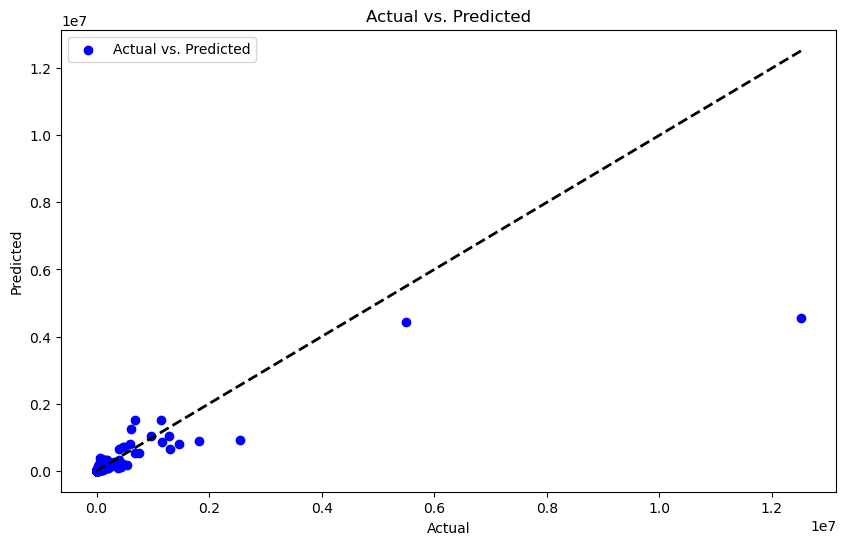

In [80]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Model Score (R^2):", r2)
print("Random Forest Regression Mean Absolute Error:", mae)

Random Forest Regression Model Score (R^2): 0.655769345439908
Random Forest Regression Mean Absolute Error: 26208.26894718107


KeyError: 'Assembly_EstTotalSeconds_ThisLaborGroup'

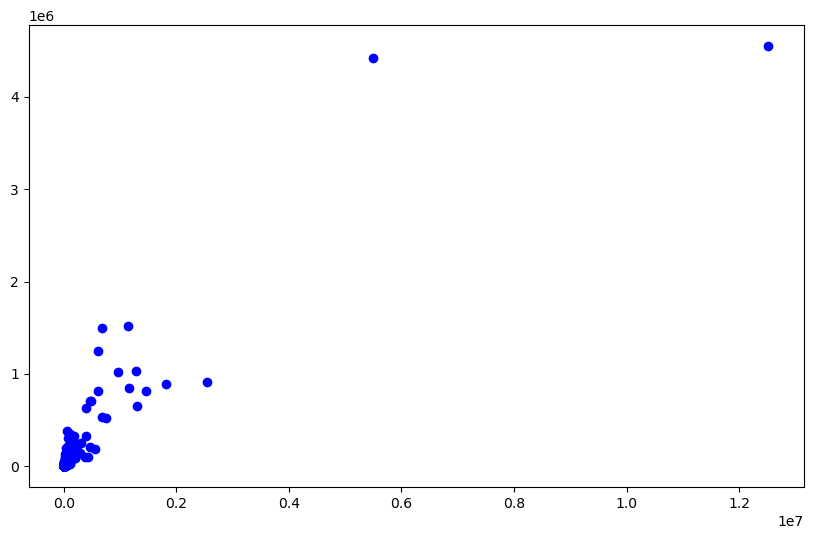

In [78]:
# Plot actual vs. predicted values and Assembly_EstTotalHours_ThisLaborGroup vs. predicted values
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs. Predicted')

# Plot Assembly_EstTotalHours_ThisLaborGroup vs. predicted values
plt.scatter(X_test['Assembly_EstTotalSeconds_ThisLaborGroup'], y_pred_rf, color='red', label='Assembly_EstTotalSeconds_ThisLaborGroup vs. Predicted')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual / Assembly_EstTotalSeconds_ThisLaborGroup')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted / Assembly_EstTotalSeconds_ThisLaborGroup vs. Predicted')
plt.legend()
plt.show()

# Random Forest Classifer

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [66]:
# Convert TimeInSeconds_ThisWorkSegment to categorical variable
y_class = pd.qcut(df_reduce_encoded['TimeInSeconds_ThisWorkSegment'], q=5, labels=[1, 2, 3, 4, 5])

In [67]:
# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [68]:
# Scale the features
scaler_class = StandardScaler()
X_train_scaled_class = scaler_class.fit_transform(X_train_class)
X_test_scaled_class = scaler_class.transform(X_test_class)

In [69]:
# Instantiate the Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=500, random_state=78)

In [70]:
# Fit the model to the training data
rf_clf.fit(X_train_scaled_class, y_train_class)

RandomForestClassifier(n_estimators=500, random_state=78)

In [71]:
# Predict the target values for the test set
y_pred_rf_class = rf_clf.predict(X_test_scaled_class)

In [72]:
# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_rf_class)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.9146496815286624


# Model Evaluation

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

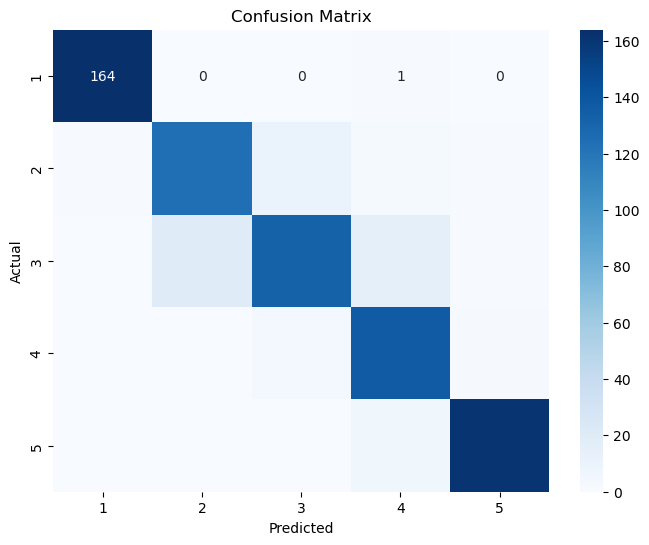

In [74]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_rf_class)

# Define labels for the confusion matrix
labels = [1, 2, 3, 4, 5]

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [75]:
# Display results
print("Confusion Matrix:")
display(cm_df)
acc_score = accuracy_score(y_test_class, y_pred_rf_class)
print(f"Accuracy Score:{acc_score}")
print("Classification Report")
print(classification_report(y_test_class, y_pred_rf_class))

Confusion Matrix:


,1,2,3,4,5
1,164,0,0,1,0
2,1,124,11,3,1
3,0,20,132,16,1
4,0,0,4,137,2
5,0,0,0,7,161


Accuracy Score:0.9146496815286624
Classification Report
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       165
           2       0.86      0.89      0.87       140
           3       0.90      0.78      0.84       169
           4       0.84      0.96      0.89       143
           5       0.98      0.96      0.97       168

    accuracy                           0.91       785
   macro avg       0.91      0.92      0.91       785
weighted avg       0.92      0.91      0.91       785



In [76]:
# Calculate feature importances
feature_importances = rf_clf.feature_importances_

# Sort features by importance
sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True)

[(0.40855574117590127, 'TimeInSeconds_ThisWorkSegment'),
 (0.10483677062507471, 'EPM_AdjustedStationName_Material Handling'),
 (0.05797813776385061, 'Assembly_WeightEachLbs'),
 (0.05026383947762021, 'EPM_ProductionControlItemID'),
 (0.048961990315135324, 'Assembly_NumSmallParts'),
 (0.047573501446506, 'Assembly_MainPartLengthFt'),
 (0.03693612374532388, 'EPM_AdjustedStationName_Fab/Layout'),
 (0.03390042859789439, 'EPM_InstanceNumber'),
 (0.03361964601481076, 'EPM_AdjustedStationName_Weld'),
 (0.01956602257777704, 'Assembly_TotalQuantityInJob'),
 (0.007916601393299182, 'EPM_AdjustedStationName_Peddi Assembler'),
 (0.0053624628845671575, 'Assembly_MainPartFinishDescr_D - Steel, Paint All'),
 (0.004795495258555571, 'Assembly_MainPartShape_L'),
 (0.0042619855084277325, 'Assembly_MainPieceProductionCode_ANGLE'),
 (0.004107483222284825, 'Assembly_MainPartFinishDescr_N - No Paint'),
 (0.003941475388334898, 'Assembly_MainPartShape_W'),
 (0.00393249856949938, 'Assembly_MainPartShape_PL'),
 (0.

<Figure size 1000x600 with 0 Axes>

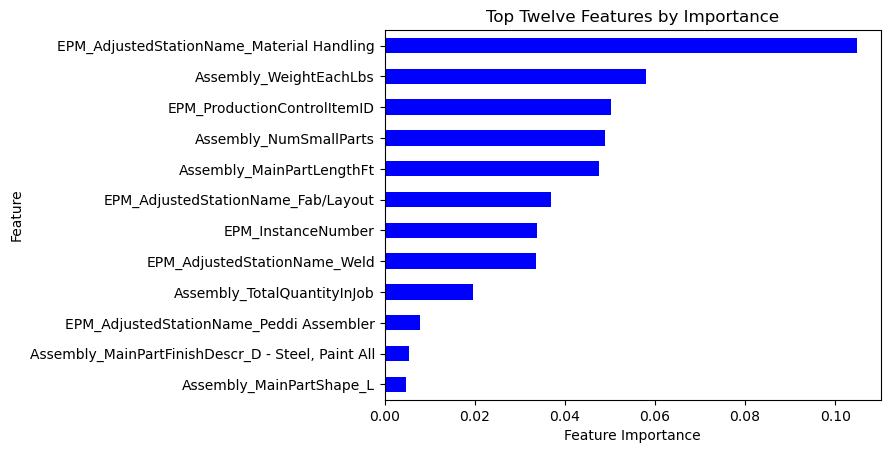

In [77]:
plt.figure(figsize=(10, 6))
# Exclude TimeInSeconds_ThisWorkSegment feature
feature_importance_df = pd.DataFrame(sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True))
feature_importance_df.set_index(feature_importance_df[1], inplace=True)
feature_importance_df.drop(columns=1, inplace=True)
feature_importance_df.rename(columns={0:'Feature Importances'}, inplace=True)
feature_importance_sorted = feature_importance_df.sort_values(by='Feature Importances')
top_twelve_features = feature_importance_sorted[:-1].tail(12)  # Excluding TimeInSeconds_ThisWorkSegment and selecting the top twelve features
top_twelve_features.plot(kind='barh', color='blue', title='Top Twelve Features by Importance', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()